***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv('/home/hub/git-pessoal/Aulas_git_Ai2/9 - Estatistica/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
df['Renda'].min()

0

In [5]:
df['Renda'].max()

200000

In [6]:
classes = [0, 1576, 3940, 11820, 19700, 20000]

### 2º Definir os labels das classes

In [7]:
labels = ['E - Até 2 SM','D - De 2 a 5 SM','C - De 5 a 15 SM', 'B - De 15 a 25 SM', 'A - Acima de 25 SM']

### 3º Construir a coluna de frequências

In [8]:
new_freq = pd.value_counts(
pd.cut(x = df.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True)) #include_lowest inclui o zero na busca
new_freq

E - Até 2 SM          49755
D - De 2 a 5 SM       18602
C - De 5 a 15 SM       7241
B - De 15 a 25 SM       822
A - Acima de 25 SM      161
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [9]:
new_percent = pd.value_counts(
pd.cut(x = df.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True),
    normalize = True)*100
new_percent

E - Até 2 SM          64.970423
D - De 2 a 5 SM       24.290620
C - De 5 a 15 SM       9.455348
B - De 15 a 25 SM      1.073373
A - Acima de 25 SM     0.210235
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
dist = pd.DataFrame({'Frequência': new_freq, 'Porcentagem(%)': new_percent})
dist.rename_axis('Classificação', axis = 'columns', inplace = True)
dist.sort_index(ascending = False)

Classificação,Frequência,Porcentagem(%)
A - Acima de 25 SM,161,0.210235
B - De 15 a 25 SM,822,1.073373
C - De 5 a 15 SM,7241,9.455348
D - De 2 a 5 SM,18602,24.290620
E - Até 2 SM,49755,64.970423


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

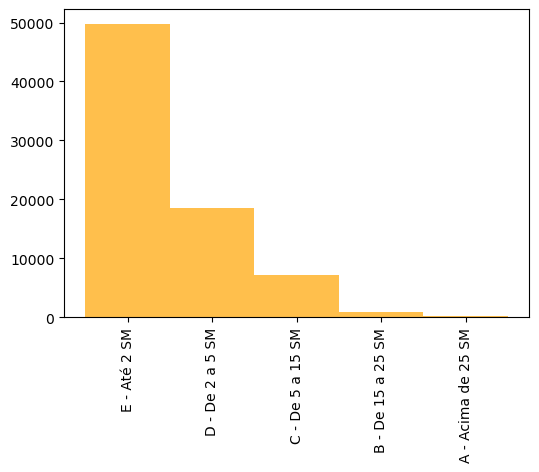

In [11]:
dist['Frequência'].sort_values(ascending = False).plot.bar(width = 1,
        color = 'orange', alpha = 0.7,figsize = (6, 4))

> ### Conclusões

<font color='green'>O gráfico mostra uma distribuição de frequência assimétrica das classes, consequentemente os dados não podem ser ajustados em uma curva de distribuição Gaussiana. A distribuição de frequência possui um comportamento monotonicamente decrescente em que a frequência diminui com o aumento da variável renda. Podemos inferir que a distribuição de renda no Brasil no ano de 2015 não é é homogênea entre a amostra de 76839 indivíduos que participaram dessa pesquisa. A Classe "A" cuja renda é de até 2 salários mínimos (R$ 1576,00) engloba 65\% dos indivíduos.</font>

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

As variáveis quantitativas desse dataset além da renda já visualizada anteriormente, são: altura e idade.

### 1. Gráfico de distribuição de frequência de altura

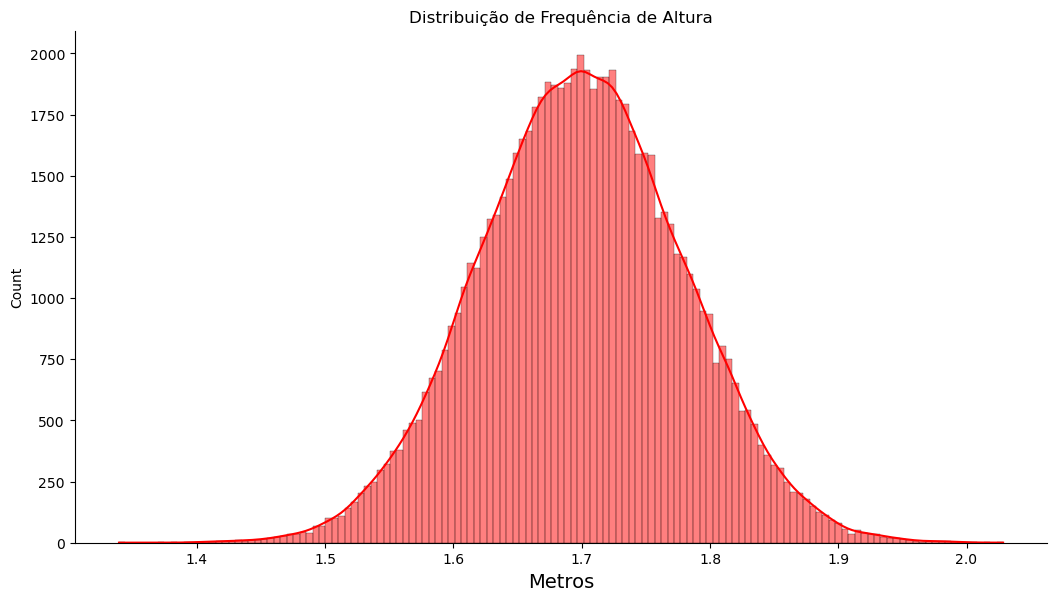

In [12]:
ax = sns.displot(df.Altura, kde = True, color = 'red', alpha = 0.5).set(
    title='Distribuição de Frequência de Altura')
ax.figure.set_size_inches(12, 6)
ax.set_xlabels('Metros', fontsize = 14)

In [13]:
df['Altura'].min()

1.339244614

In [14]:
df['Altura'].max()

2.028496765

In [15]:
df['Altura'].mean()

1.6995124540575812

> ### Conclusões

<font color='green'>A distribuição de frequência das alturas dos indivíduos é simétrica e se ajusta visivelmente em uma curva Gaussiana que indica uma distribuição normal dos dados. A altura média foi de 1,70 m </font>

### 2. Gráfico de distribuição de frequência de idade

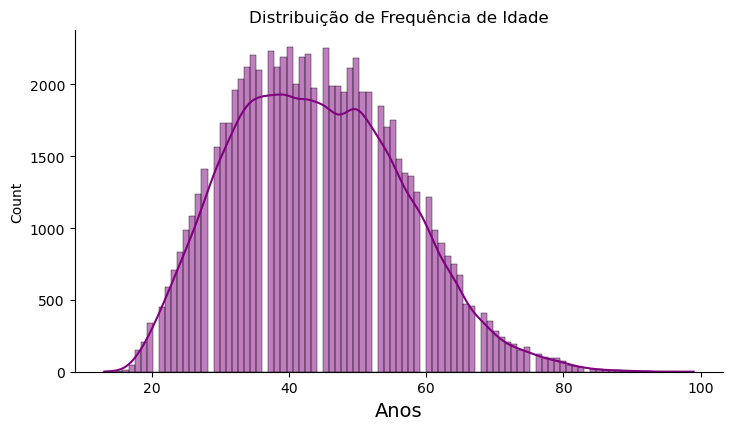

In [16]:
ax = sns.displot(df.Idade, kde = True, color = 'purple', alpha = 0.5).set(
    title='Distribuição de Frequência de Idade')
ax.figure.set_size_inches(8, 4)
ax.set_xlabels('Anos', fontsize = 14)

In [17]:
df['Idade'].mean()

44.07142113482561

> ### Conclusões

<font color='green'>A distribuição de frequência das idades dos indivíduos é assimétrica à esquerda com média de 44 anos. Observa-se que, apesar de uma distribuição equilibrada de idades, o Brasil em 2015 possuia mais idosos (<60 anos) que crianças (>18 anos).</font>

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [18]:
# Filtrando dados de renda

renda_lim = df[df['Renda'] <= 20000]

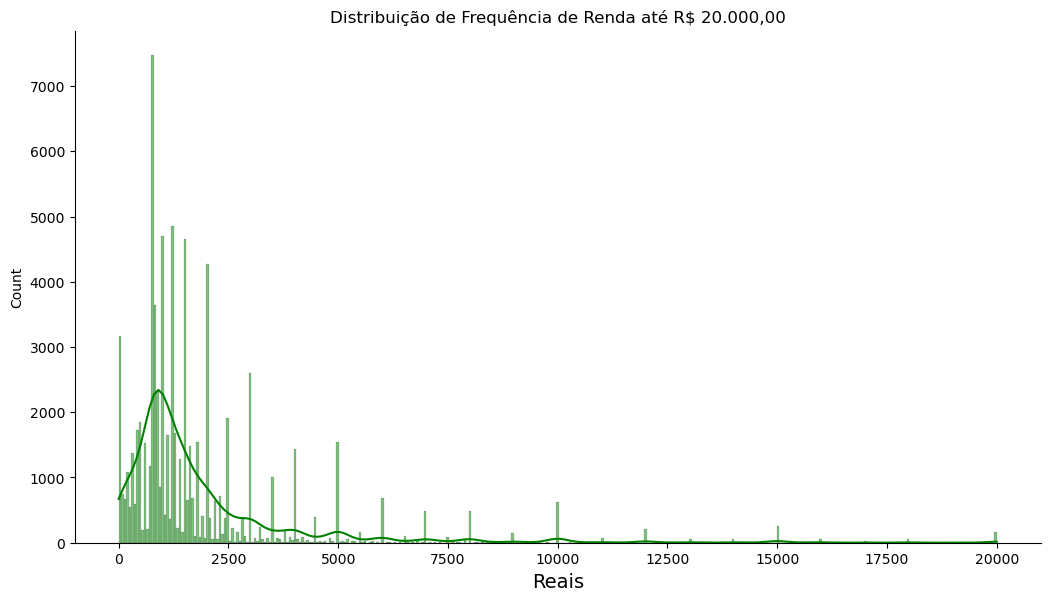

In [19]:
ax = sns.displot(renda_lim.Renda, kde = True, color = 'green', alpha = 0.5).set(
    title='Distribuição de Frequência de Renda até R$ 20.000,00')
ax.figure.set_size_inches(12, 6)
ax.set_xlabels('Reais', fontsize = 14)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [20]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

### 1. Tabela de frequência

In [21]:
new_df = pd.crosstab(df.Sexo,
                   df.Cor)

new_df.rename(index=sexo, inplace=True)
new_df.rename(columns=cor, inplace=True)
new_df

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


### 2. Tabela de percentual

In [22]:
perc = pd.crosstab(df.Sexo,
                     df.Cor,
                     normalize = True) * 100
perc.rename(index=sexo, inplace = True)
perc.rename(columns=cor, inplace = True)
perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

<font color = 'green'>A tabela mostra a maioria dos indivíduos destra amostragem são homens pardos seguido de homens brancos. Somente na terceira maior ocorrência dos dados encontram-se mulehres pardas seguidas de mulheres brancas.</font>

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [23]:
print('A média dos dados de renda é de {:.2f}'.format(df['Renda'].mean()))

A média dos dados de renda é de 2000.38


### Obtenha a mediana

In [24]:
print('A mediana dos dados de renda é de {:.2f}'.format(df['Renda'].median()))

A mediana dos dados de renda é de 1200.00


### Obtenha a moda

In [25]:
print('A moda dos dados de renda é de {}'.format(df['Renda'].mode()))

A moda dos dados de renda é de 0    788
dtype: int64


### Obtenha o desvio médio absoluto

In [26]:
print('O desvio médio absoluto dos dados de renda é de {:.0f}'.format(df['Renda'].mad()))

O desvio médio absoluto dos dados de renda é de 1526


### Obtenha a variância

In [27]:
print('A variância dos dados de renda é de {:.0f}'.format(df['Renda'].var()))

A variância dos dados de renda é de 11044906


### Obtenha o desvio-padrão

In [28]:
print('A variância dos dados de renda é de {:.2f}'.format(df['Renda'].std()))

A variância dos dados de renda é de 3323.39


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [29]:
renda_mean = pd.crosstab(df.Sexo,
                     df.Cor,
                      aggfunc = {'mean', 'median', 'max'},
                      values=df.Renda)
renda_mean.rename(index=sexo, inplace = True)
renda_mean.rename(columns=cor, inplace = True)
renda_mean

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

> ### Conclusões

<font color = 'green'>Um resultado que chama a atenção é de que apenas mulheres declaradas indígenas possuem renda máxima superior aos homens. Todos as demais análises de valores máximos ou mesmo média e mediana mostram que homens tinham maior renda que mulheres no ano de 2015.</font>

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [41]:
df['Cor'] = df['Cor'].astype('category')
df['Sexo'] = df['Sexo'].astype('category')
df['Anos de Estudo'] = df['Anos de Estudo'].astype('category')
df['UF'] = df['UF'].astype('category')

df['Cor'] = df['Cor'].cat.rename_categories({0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'})
df['Sexo'] = df['Sexo'].cat.rename_categories({0: 'Masculino', 1: 'Feminino'})
df['Anos de Estudo'] = df['Anos de Estudo'].cat.rename_categories({
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
})
df['UF'] = df['UF'].cat.rename_categories({11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
})

[Text(0.5, 1.0, 'Gráfico de dispersão de Renda para diferentes Raças (cor) e Sexo')]

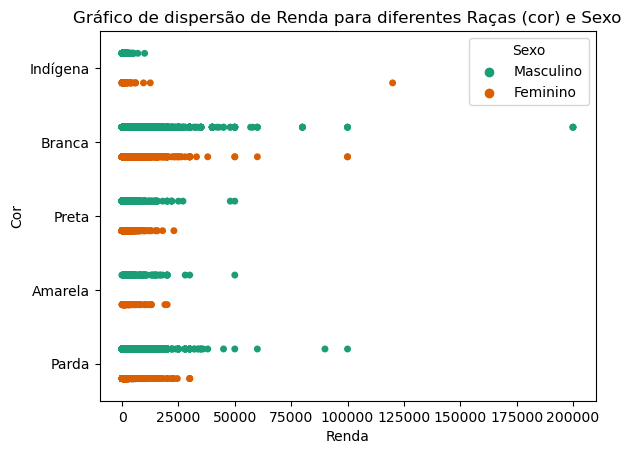

In [31]:
sns.stripplot(data=df, x = 'Renda', y = 'Cor', hue = 'Sexo', dodge = True, jitter = False, palette = 'Dark2').set(
    title='Gráfico de dispersão de Renda para diferentes Raças (cor) e Sexo')

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

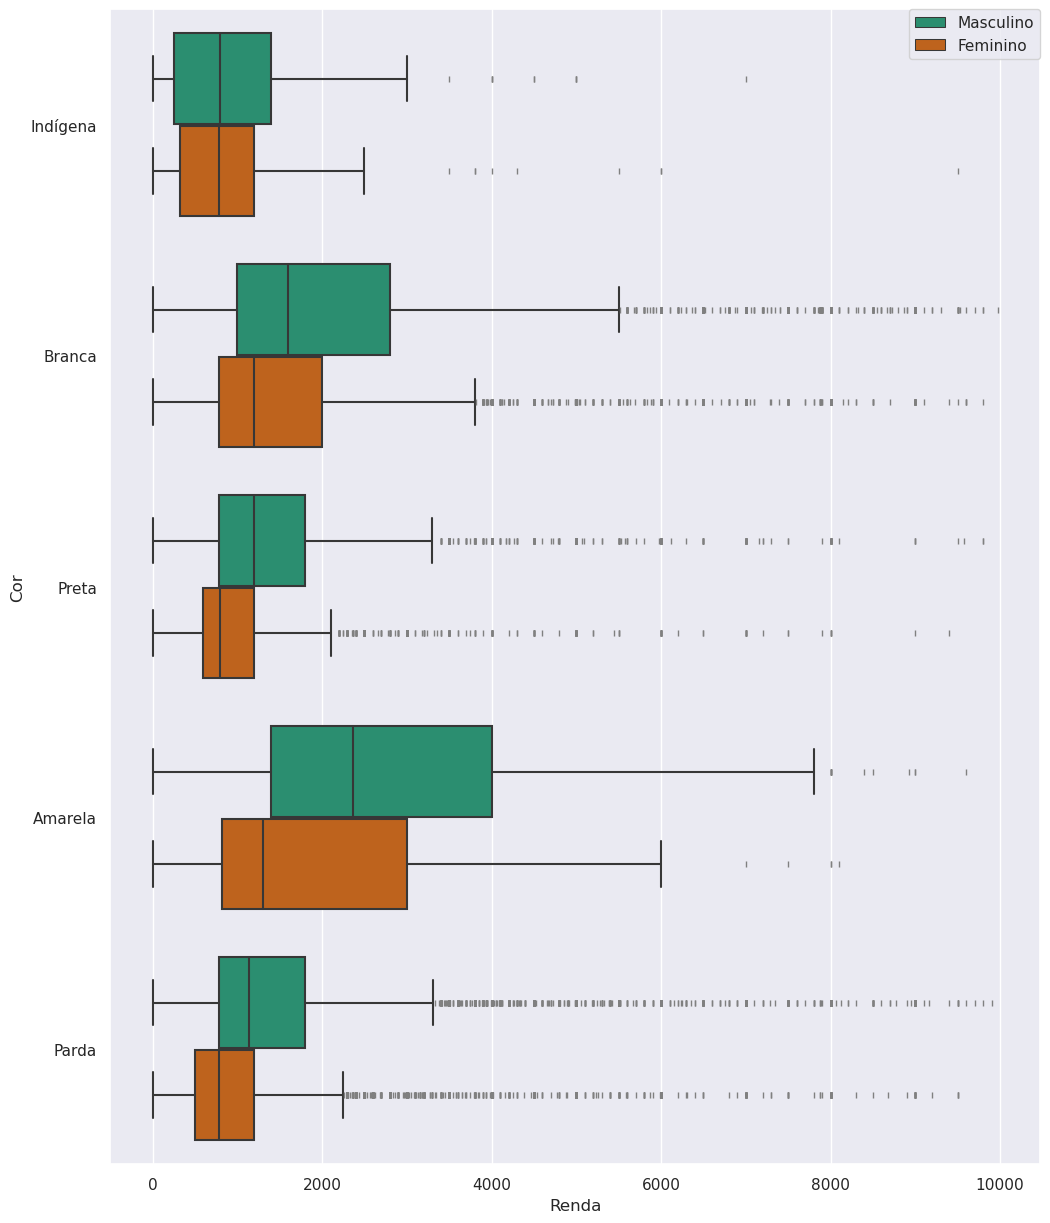

In [46]:
df_renda10 = df[df['Renda'] < 10000]

fps = dict(marker='|', markerfacecolor='white', markersize=4, markeredgecolor='gray',
                  linestyle='none')

sns.boxplot(data=df_renda10, x = 'Renda', y = 'Cor', hue = 'Sexo', palette = 'Dark2', flierprops = fps).legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)

> ### Conclusões


<font color = 'green'>O gráfico boxplot permite visualizar informações estatísticas como a indicação da mediana, quartis e outliers dos dados diferentemente do gráfico anterior de dispersão. 
Comparativamente, fica mais evidente quando alguns dados, por exemplo da Raça Indígena, possui menor variação entre os indivíduos. O comportamento dos dados para a Raça Amarela também fica mais claro. Os outliers para a Raça Parda também é evidenciado no boxplot.</font>

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [33]:
from scipy import stats

val = 788
perc_1sm = stats.percentileofscore(df['Renda'], val)
print('{:.2f}% dos indivíduos possuem renda de até salário mínimo (R$788,00).'.format(perc_1sm))

24.39% dos indivíduos possuem renda de até salário mínimo (R$788,00).


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [34]:
print('99% dos indivíduos possuem renda de até R${:.0f}.'.format(df['Renda'].quantile(0.99)))

99% dos indivíduos possuem renda de até R$15000.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [35]:
df['Anos de Estudo'] = df['Anos de Estudo'].astype('category')
df['Anos de Estudo'] = df['Anos de Estudo'].cat.rename_categories({0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'})

In [36]:
renda2 = pd.crosstab(df['Anos de Estudo'], df.Sexo,
                      aggfunc = {'mean', 'median', 'max', 'std'},
                      values=df.Renda).round(2)
renda2.rename(index=anos_de_estudo, inplace = True)
renda2.rename(columns=sexo, inplace = True)
renda2

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

[Text(0.5, 1.0, 'Boxplot dos dados de Renda até R$ 10.000,00 de indivíduos com 40 anos')]

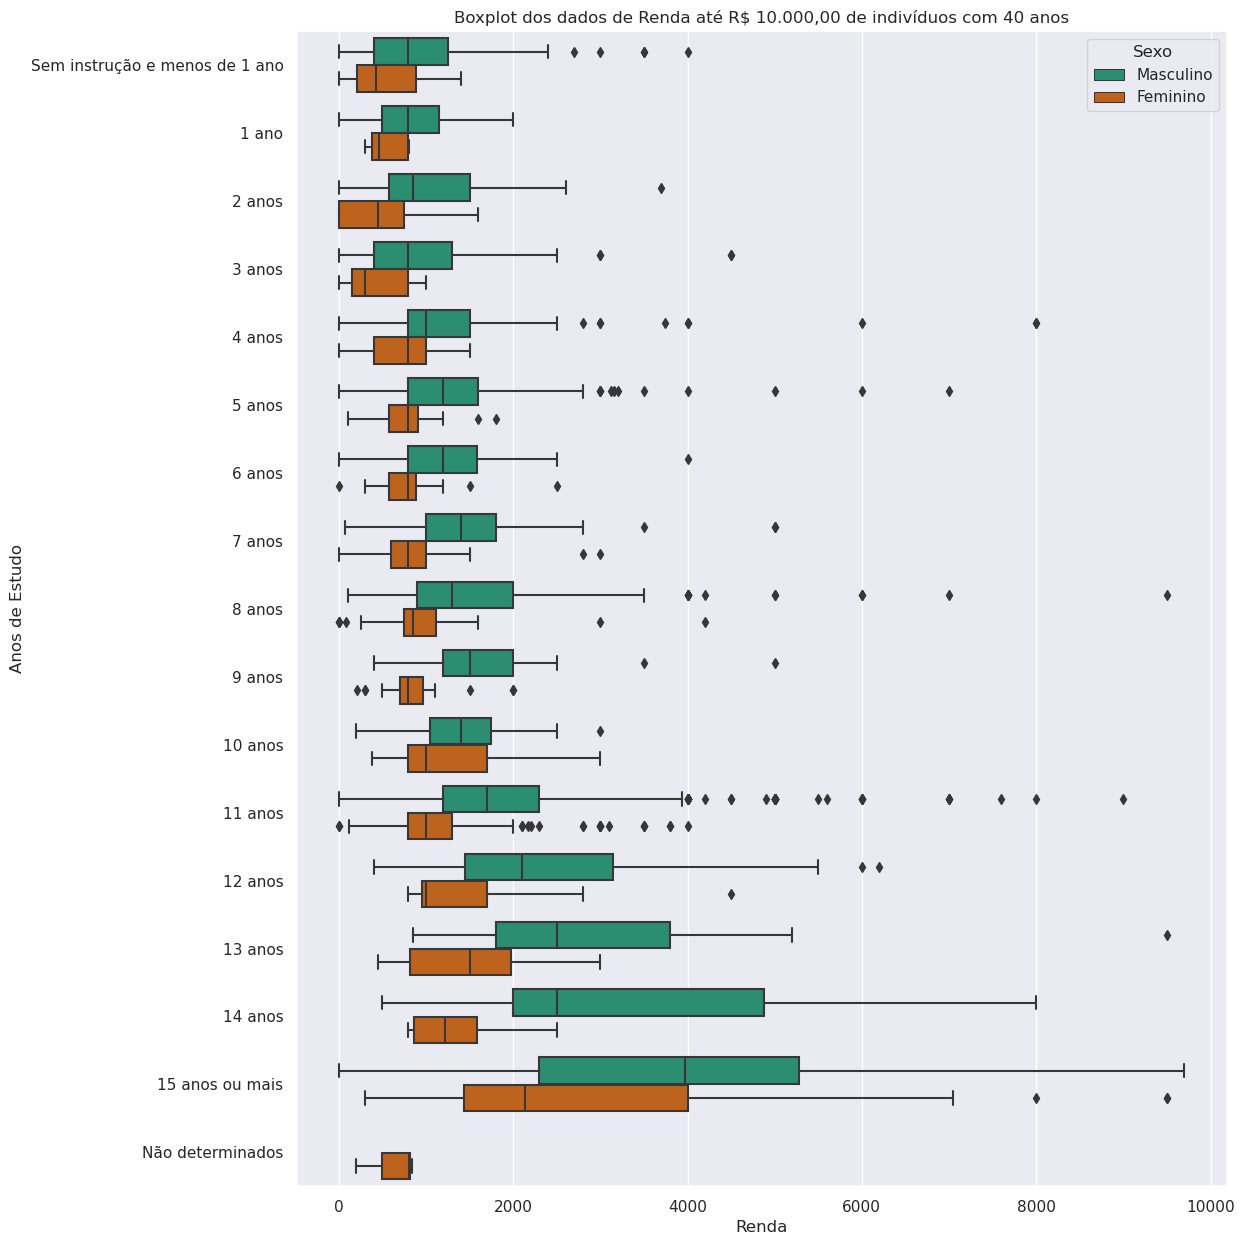

In [47]:
df_idade = df_renda10[df_renda10['Idade'] == 40]

sns.set(rc={'figure.figsize':(12,15)})
sns.boxplot(data=df_idade, x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', palette = 'Dark2').set(
    title='Boxplot dos dados de Renda até R$ 10.000,00 de indivíduos com 40 anos')

> ### Conclusões

<font color = 'green'>Podemos observar que para indivíduos com 40 anos quanto maior o tempo de estudo a renda tende a aumentar. Nota-se também uma maior distância interquartil com o aumento do tempo de estudo. Com relação ao sexos, fica evidente que, mesmo com o mesmo tempo de estudo, mulheres possuem renda menor que os homens de mesma raça.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [42]:
df.groupby(['UF']).agg({'Renda':['mean','median','max','std']})

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

[Text(0.5, 1.0, 'Boxplot dos dados de Renda até R$ 10.000,00 por Unidades de Federação')]

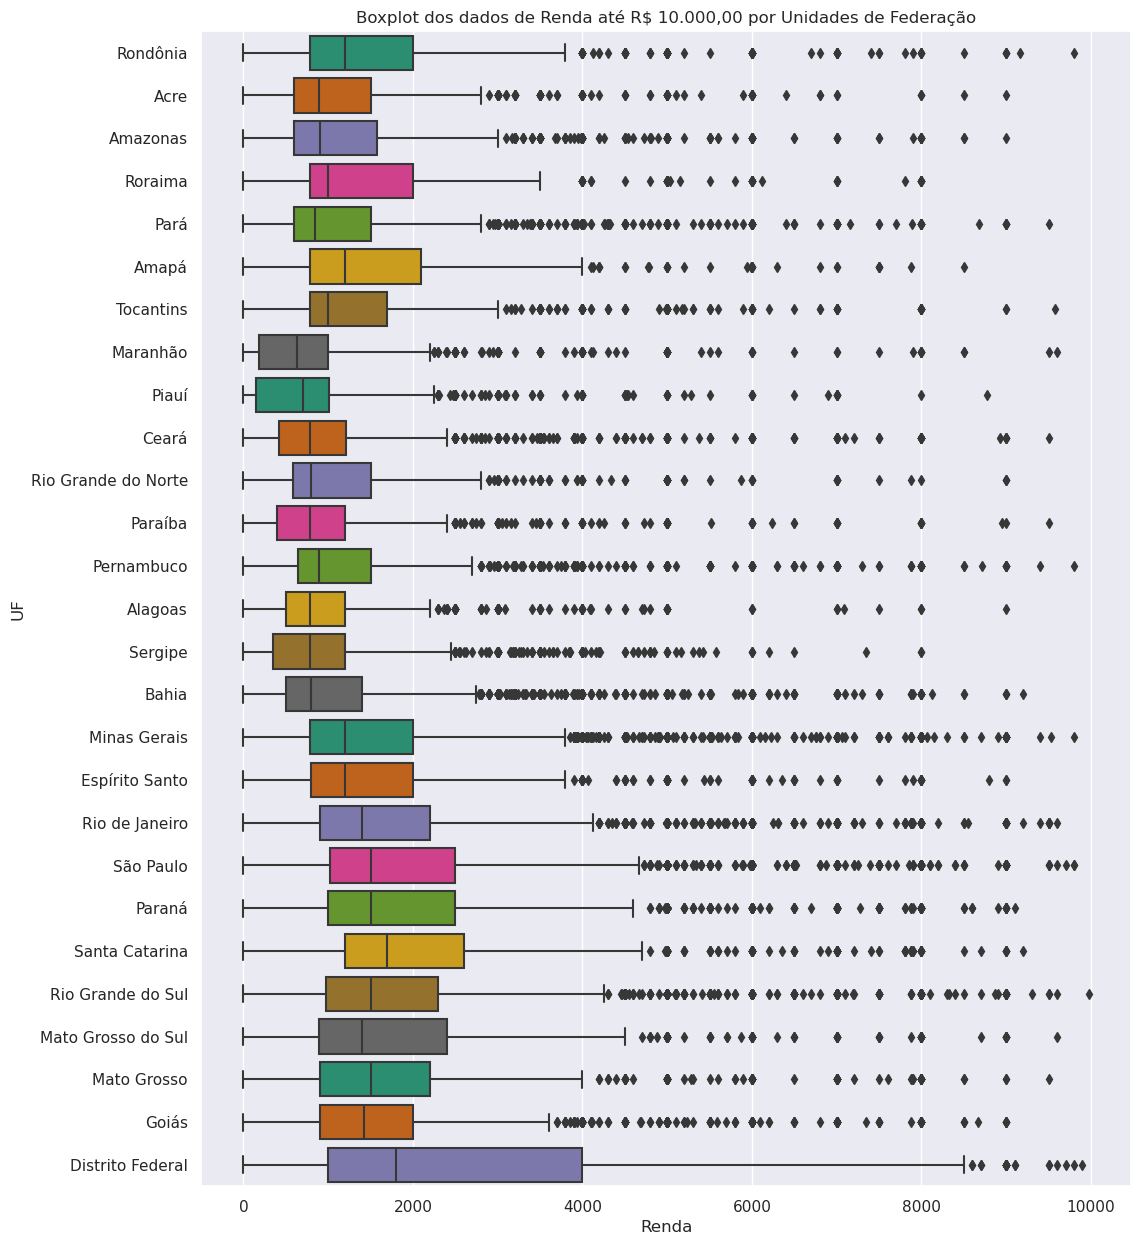

In [50]:
df_renda10

#sns.set(rc={'figure.figsize':(12,15)})
sns.boxplot(data=df_renda10, x = 'Renda', y = 'UF', palette = 'Dark2').set(
    title='Boxplot dos dados de Renda até R$ 10.000,00 por Unidades de Federação')

> ### Conclusões

<font color  = 'green'>Esse boxplot possui uma riqueza de informações que podem ser extraídas apenas em sua visualização, sem uma análise estatística. Por exemplo, a amplitude entre a mediana e o terceiro quartil para o Distrito Federal se destaca em relação aos outro Estados. Acredito que esse comportamento tenha relação com o fato de que Brasília tenha uma maior incidência de cargos públicos (políticos) e comissionados, consequentemente, melhor remunerados que os demais Estados.
    
<font color  = 'green'>Outro comportamento interessante é de que Estados do Sudeste possuem um deslocamento dos quartis para valores de renda mais elevados que dos Estados do Nordeste, mostrando que os indivíduos no Sudeste possuem uma renda mais elevada. Por exemplo, o valor do terceiro quartil para os Estados do Maranhão e Piaiú está na mesma faixa que o primeiro quartil do Estado do Paraná, ou seja, 75% dos indivíduos do Maranhão e Piauí possuem renda de 25% dos indivíduos paranaenses, reforçando informações de desigualdade que temos conhecimento como brasileiros.</font>